<center>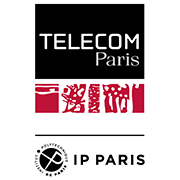</center>

------------------------
<br />

<h1><center><strong><font color="chillipepper"> BGDIA 704 : Machine Learning Avancé </font></strong></center></h1>
<h3><center><font color="red"><strong> Master BGD </strong></font></center></h3>
<h3><center><font color="red"><strong> Projet : Classification de textes avec Pytorch </strong></font></center></h3>

<center>
<h3> Etudiant : MAHAMAT ATTEÏB Adoum </h3>
<br/>
</center>

<br />

------------------------

The goal of this lab are to:
- Implement an 'handmade' model of text classification with word embeddings,
- Learn how to use Pytorch for treating textual data, 
- Implementing neural classification models with Pytorch.

Besides ```torch```, we will use ```gensim``` to obain word embeddings, and ```scikit-learn``` for simple classification models.  

**Import des librairies**

In [1]:
import os.path as op
import re 
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import warnings

In [2]:
import string
from nltk.corpus import stopwords

<h3><font color="red"><strong> I-Simple classifier on top of dense representations </strong></font></h3>

<h3><font color="red"><strong> I.1 Dataset </strong></font></h3>

We're going to work with the **20NewsGroup** data. This dataset is available in ```scikit-learn```, you can find all relevant information in the [documentation](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html).

In [3]:
from sklearn.datasets import fetch_20newsgroups

In [4]:
# Import training data
ng_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

pprint (pretty-print) permet d'avoir un affichage esthétique.

In [5]:
# Let's look at what is in this object
# pprint(dir(ng_train))

In [6]:
# Let's look at the categories

pprint(ng_train.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [7]:
# Dimension

print("dimension de ng_train :", ng_train.filenames.shape)
print("dimension de target :", ng_train.target.shape)

dimension de ng_train : (11314,)
dimension de target : (11314,)


In [8]:
# Afficher du premier paragraphe et son target associé

pprint(ng_train.data[0])
print("Target: ", ng_train.target_names[ng_train.target[0]])

('I was wondering if anyone out there could enlighten me on this car I saw\n'
 'the other day. It was a 2-door sports car, looked to be from the late 60s/\n'
 'early 70s. It was called a Bricklin. The doors were really small. In '
 'addition,\n'
 'the front bumper was separate from the rest of the body. This is \n'
 'all I know. If anyone can tellme a model name, engine specs, years\n'
 'of production, where this car is made, history, or whatever info you\n'
 'have on this funky looking car, please e-mail.')
Target:  rec.autos


In [ ]:
import gensim.downloader as api
import numpy as np

# Load the GLoVe model
loaded_glove_model = api.load("glove-wiki-gigaword-300")

# Example text (replace this with your actual texts)
texts = ng_train.data

# Function to convert text to embeddings
def text_to_embedding(text, model):
    words = text.split()  # Simple tokenization
    word_embeddings = []
    for word in words:
        try:
            word_embeddings.append(model[word])
        except KeyError:
            # Word not in vocabulary
            continue
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        # Return a zero vector if no words in the sentence are in the vocabulary
        return np.zeros(model.vector_size)

# Convert each text to an embedding
embeddings = [text_to_embedding(text, loaded_glove_model) for text in texts]


c:\Users\PC\miniconda3\envs\bigdata\Lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0)/charset_normalizer (None) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [ ]:
pd.DataFrame(embeddings).shape

In [108]:
data_embedding =pd.DataFrame(embeddings)

In [111]:
data_embedding["Text"] = ng_train.data
data_embedding["Target"]  = ng_train.target

In [112]:
data_embedding.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,Text,Target
0,-0.081641,0.106466,-0.089801,-0.187502,-0.035908,0.073886,-0.093287,0.046966,0.019900,-1.483447,...,0.023456,0.118861,0.117075,0.109925,0.014032,-0.141316,-0.049853,0.097149,I was wondering if anyone out there could enli...,7
1,-0.192722,0.090886,-0.037941,-0.182325,-0.073636,0.046888,-0.017921,0.057675,0.120606,-1.341660,...,-0.048705,-0.067266,0.108572,0.125852,-0.012514,-0.215201,-0.094108,-0.055174,A fair number of brave souls who upgraded thei...,4
2,-0.146749,0.137878,-0.063274,-0.132565,-0.026561,0.071376,-0.036450,0.021623,0.078519,-1.477805,...,0.003481,0.047962,0.128210,0.039242,0.018574,-0.184098,-0.059538,0.093241,"well folks, my mac plus finally gave up the gh...",4
3,-0.256111,0.031221,-0.123513,-0.125411,0.019071,0.078238,0.029534,0.055957,0.169093,-1.955878,...,0.080499,0.018956,0.167398,-0.172218,-0.112693,-0.279659,-0.079480,0.048712,\nDo you have Weitek's address/phone number? ...,1
4,-0.146598,0.092058,-0.051261,-0.050381,-0.083395,0.080609,-0.039038,0.093979,0.109922,-1.618899,...,-0.018306,0.034797,0.060970,0.107941,0.002402,-0.273170,-0.018086,0.033943,"From article <C5owCB.n3p@world.std.com>, by to...",14


The dataset can be rather difficult as it is; especially, some categories are very close to each other. We can simplify the task by using the higher-level categorisation of the newsgroups, thanks to the following function:

In [9]:
def aggregate_labels(label):
    # comp
    if label in [1,2,3,4,5]:
        new_label = 0
    # rec
    if label in [7,8,9,10]:
        new_label = 1
    # sci
    if label in [11,12,13,14]:
        new_label = 2
    # misc 
    if label in [6]:
        new_label = 3
    # pol
    if label in [16,17,18]:
        new_label = 4
    # rel
    if label in [0,15,19]:
        new_label = 5
    return new_label

La fonction "aggregate_labels" a pour but de labelliser (d'attribuer un label) les .

**comp (ordinateur) :** Si label est dans la liste **\[1,2,3,4,5\]**, cela signifie que l'étiquette originale appartient à une catégorie générale liée à l'informatique ou à la technologie. La fonction attribuer alors à new_labell a valeur 0.

**rec (loisirs) :** Si label est dans la liste **\[7,8,9,10\]**, l'étiquette originale new_label est mis à 1.

**sci (science) :** Si label est dans la liste **\[11,12,13,14\]**, new_label devient 2.

**divers :** Si label est **\[6\]**, new_label est défini à 3.

**pol (politique) :** Si label est dans la liste **\[16,17,18\]**, l'étiquette est associée new_labell a valeur 4.

**rel (religion) :** Si label est dans la liste **\[0,15,19\]**, cela signifie que new_labelest alors mis à 5.

We will first need to apply some pre-processing:
- The data is represented as a string: ```'I love this movie'```
- We want to obtain a list of **tokens**, which are instances of words: ```['I','love','this','movie']```

This is called **tokenization**. We will import an existing tokenizer and use it on each document to obtain a list of words. Careful, the data is not always clean and the messages are sometimes short: hence, applying tokenization can sometimes return an empty list of words. **Be careful to remove documents that are empty !**
<div class='alert alert-block alert-info'>
            Code:</div>

### Tokenization

La tokenization consiste à transformer une phrase en vecteurs de mots.

In [10]:
import nltk
# A little data necessary for the first time you use word_tokenize - uncomment
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


"punkt" est un tokenizer pré-entraîné utilisé par NLTK pour diviser un texte en une liste de phrases, en utilisant un algorithme non supervisé qui apprend les abréviations et les initiales dans le texte.

In [11]:
# Affichage du premier paragraphe "ng_train.data[0]"

ng_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [12]:
# Et si on veut afficher le premier paragraphe (ng_train.data[0]) sous forme tokenizé 

#pprint(word_tokenize(ng_train.data[0]))

**Tokenisation de "ng_train.data" et labellisation de "ng_train_labels"**

In [12]:
ng_train_text = []
ng_train_labels = []

for text, label in zip(ng_train.data, ng_train.target):
    tokens = word_tokenize(text)
    if tokens:  # Vérifie si la liste des tokens n'est pas vide
        ng_train_text.append(tokens)
        ng_train_labels.append(aggregate_labels(label))

On parcourt les données et les étiquettes simultanément avec **zip(ng_train.data, ng_train.target)**. 
Pour chaque texte, on tokenise d'abord le texte avec **word_tokenize(text)**. Ensuite, on vérifie si la liste des tokens résultante n'est pas vide ( if tokens:). Si elle n'est pas vide, on ajoute les tokens à **ng_train_text** et l'étiquette agrégée correspondante à **ng_train_labels**.

In [13]:
# Affichage de "ng_train_text[0]" tokenizé

print(ng_train_text[0])

['I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', '.', 'It', 'was', 'a', '2-door', 'sports', 'car', ',', 'looked', 'to', 'be', 'from', 'the', 'late', '60s/', 'early', '70s', '.', 'It', 'was', 'called', 'a', 'Bricklin', '.', 'The', 'doors', 'were', 'really', 'small', '.', 'In', 'addition', ',', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', '.', 'This', 'is', 'all', 'I', 'know', '.', 'If', 'anyone', 'can', 'tellme', 'a', 'model', 'name', ',', 'engine', 'specs', ',', 'years', 'of', 'production', ',', 'where', 'this', 'car', 'is', 'made', ',', 'history', ',', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', ',', 'please', 'e-mail', '.']


**Tokenisation de "ng_test.data" et labellisation de "ng_test_labels"**

In [14]:
ng_test = fetch_20newsgroups( subset='test', remove=('headers', 'footers', 'quotes') )

In [15]:
ng_test_text = []
ng_test_labels = []

for text, label in zip(ng_test.data, ng_test.target):
    tokens = word_tokenize(text)
    if tokens:                         # Vérifie si la liste des tokens n'est pas vide
        ng_test_text.append(tokens)    # Remplir les tokens dans "ng_test_text"
        ng_test_labels.append(aggregate_labels(label))

<h3><font color="red"><strong> I.2 Get a vocabulary. </strong></font></h3>

Now that the data is tokenized, the first step we will follow is to pick a **common vocabulary** that we will use for every model we create in this lab. 

It would be too costly to ask our model to represent every word. We will have to be able to control its size, either by indicating a **maximum number of words**. **We add, at the end, an "unknown" word that will replace all the words that do not appear in our "limited" vocabulary**.

<div class='alert alert-block alert-info'>
            Code:</div>

**Fonction "vocabulary" complétée**

Cette fonction permet de compter l'occurence de mots à partir du corpus déjà tokenizé.

In [35]:
def vocabulary(corpus, voc_threshold=None):
    """
    Function using word counts to build a vocabulary - can be improved with a second parameter for
    setting a frequency threshold
    Params:
        corpus (list of list of tokens): corpus of sentences already tokenized
        voc_threshold (int): maximum size of the vocabulary. Use "0" to indicate no limit
    Returns:
        vocabulary (dictionary): keys: list of distinct words across the corpus
                                  values: indexes corresponding to each word sorted by frequency
        vocabulary_word_counts (dictionary): keys: list of distinct words across the corpus
                                             values: corresponding counts of words in the corpus
    """

    # Bloc 1: Comptage des mots dans le corpus
    word_counts = {} # dictionnaire 
    for sent in corpus:
        for word in sent:
            if word not in word_counts:
                word_counts[word] = 0
            word_counts[word] += 1

    # Bloc 2: Tri des mots par nombre d'occurrences
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    if voc_threshold is not None and voc_threshold > 0:
        # Bloc 3: Création du vocabulaire avec seuil de fréquence
        top_words = [word for word, _ in sorted_words[:voc_threshold]]
        vocabulary = {word: idx for idx, word in enumerate(top_words)}
        unk_count = sum(count for _, count in sorted_words[voc_threshold:])
        word_counts = {word: count for word, count in sorted_words[:voc_threshold]}
        word_counts['UNK'] = unk_count
    else:
        # Bloc 4: Création du vocabulaire sans seuil de fréquence
        vocabulary = {word: idx for idx, (word, _) in enumerate(sorted_words)}
        word_counts = {word: count for word, count in sorted_words}
        if 'UNK' not in vocabulary:
            unk_count = sum(count for word, count in sorted_words if word not in vocabulary)
            word_counts['UNK'] = unk_count

    # Bloc 5: Gestion du mot inconnu 'UNK' dans le vocabulaire
    if 'UNK' not in vocabulary:
        vocabulary['UNK'] = len(vocabulary)
        word_counts['UNK'] = 0

    return vocabulary, word_counts

**On teste "vocabulary" sur un corpus avant de l'utiliser sur notre jeu de données**

In [36]:
# Example for testing :
corpus = ['I walked down down the boulevard',
          'I walked down the avenue',
          'I ran down the boulevard',
          'I walk down the city',
          'I walk down the the avenue']
corpus = [word_tokenize(sent) for sent in corpus]

voc, counts = vocabulary(corpus, voc_threshold = 3)
print(voc)
print(counts)

print("\n")
print("On réutilise la fonction \"vocabulary\" sans mettre de seuil voc_threshold")
voc, counts = vocabulary(corpus)
print(voc)
print(counts)

{'down': 0, 'the': 1, 'I': 2, 'UNK': 3}
{'down': 6, 'the': 6, 'I': 5, 'UNK': 0}


On réutilise la fonction "vocabulary" sans mettre de seuil voc_threshold
{'down': 0, 'the': 1, 'I': 2, 'walked': 3, 'boulevard': 4, 'avenue': 5, 'walk': 6, 'ran': 7, 'city': 8, 'UNK': 9}
{'down': 6, 'the': 6, 'I': 5, 'walked': 2, 'boulevard': 2, 'avenue': 2, 'walk': 2, 'ran': 1, 'city': 1, 'UNK': 0}


On obtient les résultats attendus, cela nous garantit le bon fonctionnement de notre fonction.

**On applique la fonction "vocabulary" sur ng_train_text**

On fixe le seuil "voc_threshold" à 100. On recupère les 100 premiers mots avec leur occurence.

In [37]:
# Testing the function with the given corpus and thresholds

voc, counts = vocabulary(ng_train_text, voc_threshold=100)
print("Vocabulary with threshold 100:")
print(voc)
print(counts)

Vocabulary with threshold 100:
{',': 0, '.': 1, 'the': 2, '>': 3, "'AX": 4, '--': 5, 'to': 6, 'of': 7, '(': 8, 'a': 9, 'and': 10, ')': 11, 'I': 12, '*': 13, 'is': 14, 'in': 15, ':': 16, 'that': 17, '?': 18, "''": 19, 'it': 20, '@': 21, 'for': 22, '``': 23, '$': 24, 'you': 25, ';': 26, '!': 27, '<': 28, '%': 29, 'on': 30, 'be': 31, '#': 32, 'have': 33, ']': 34, 'are': 35, "'": 36, 'with': 37, '`': 38, 'not': 39, '&': 40, '[': 41, 'this': 42, "'s": 43, 'The': 44, 'as': 45, '-': 46, 'or': 47, "n't": 48, 'was': 49, 'do': 50, 'by': 51, 'from': 52, 'but': 53, 'they': 54, 'at': 55, 'can': 56, 'an': 57, 'will': 58, 'would': 59, '1': 60, 'if': 61, 'about': 62, 'all': 63, 'one': 64, 'X': 65, 'my': 66, 'has': 67, 'there': 68, 'your': 69, 'we': 70, 'M': 71, 'what': 72, 'he': 73, '2': 74, 'which': 75, 'MAX': 76, 'me': 77, 'It': 78, '...': 79, 'some': 80, 'who': 81, 'out': 82, 'any': 83, 'were': 84, 'so': 85, 'more': 86, 'people': 87, 'their': 88, 'like': 89, 'If': 90, 'other': 91, 'no': 92, 'A': 93

In [38]:
# Le limite d'affichage de Jupyter est atteint et le résultat ne s'affiche pas !

voc, counts = vocabulary(ng_train_text)
print("\nFull Vocabulary:")
print(voc)
print(counts)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



**Représentation Graphique : Loi de Zipf**

La loi de Zips est avant tout une loi empirique. Zips a constaté que la fréquence d’utilisation d’un mot dans un texte était inversement proportionnelle à son rang. La loi de Zips s’intéresse à la répartition statistique des fréquences d’apparition des différents mots dans un langage.

We would like to get an idea of what's in these texts. So we'll get the vocabulary (in full) and represent the frequencies of the words, in order (be careful, you'll have to use a logarithmic scale): we should find back **Zipf's law**. This will give us an idea of the size of the vocabulary we will be able to choose: it's a matter of making a compromise between the necessary resources (size of the objects in memory) and the amount of information we can get from them (rare words can bring a lot of information, but it's difficult to learn good representations of them, because they are rare!).  

<div class='alert alert-block alert-warning'>
            Question:</div>
            
Word2vec's implementation cuts the vocabulary size by using **only words with at least 5 occurences**, by default. What vocabulary size would it give here ? Does it seem like a good compromise, looking at the graph ? 

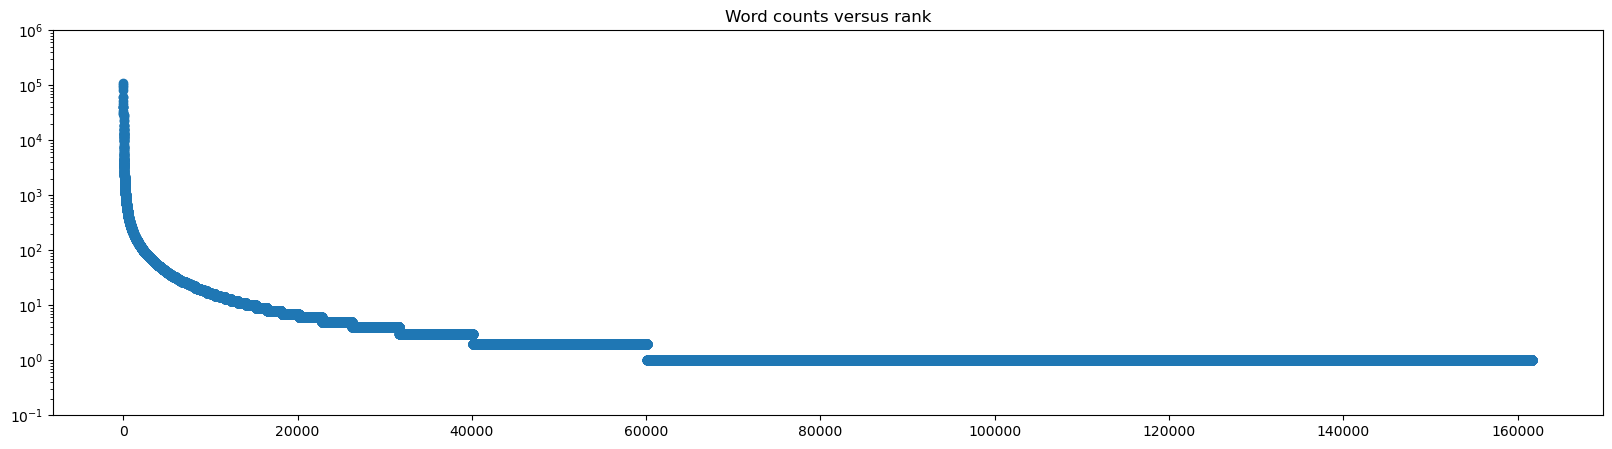

Vocabulary size: 161705
Part of the corpus by taking the "x" most frequent words:
5000 : 0.85
10000 : 0.89
15000 : 0.91
20000 : 0.93
25000 : 0.94
30000 : 0.94
35000 : 0.95
40000 : 0.95
45000 : 0.96
50000 : 0.96
55000 : 0.96
60000 : 0.97
65000 : 0.97
70000 : 0.97
75000 : 0.97
80000 : 0.97
85000 : 0.97
90000 : 0.98
95000 : 0.98
100000 : 0.98
105000 : 0.98
110000 : 0.98
115000 : 0.98
120000 : 0.99
125000 : 0.99
130000 : 0.99
135000 : 0.99
140000 : 0.99
145000 : 0.99
150000 : 1.00
155000 : 1.00
160000 : 1.00


In [43]:
# We would like to display the curve of word frequencies given their rank (index) in the vocabulary

vocab, word_counts = vocabulary(ng_train_text)                # on appelle la fonction "vocabulary"
rank_counts = {w:[vocab[w], word_counts[w]] for w in vocab}
rank_counts_array = np.array(list(rank_counts.values()))

# We can for example use the function plt.scatter(ng_train_text)
plt.figure(figsize=(20,5))
plt.title('Word counts versus rank')
plt.yscale('log')
plt.ylim(0.1, 1e6)
plt.scatter(rank_counts_array[:,0], rank_counts_array[:,1])
plt.show()

# We would like to know how much of the data is represented by the 'k' most frequent words
print('Vocabulary size: %i' % len(vocab))
print('Part of the corpus by taking the "x" most frequent words:')
for i in range(5000, len(vocab), 5000):
    print('%i : %.2f' % (i, np.sum(rank_counts_array[:i, 1]) / np.sum(rank_counts_array[:,1]) ))

Before creating the final vocabulary to be used, put aside some training data for a **validation set** ! 

<div class='alert alert-block alert-info'>
            Code:</div>

In [44]:
# subdivision du jeu de données en train, test

from sklearn.model_selection import train_test_split
train_texts_splt, val_texts, train_labels_splt, val_labels = train_test_split(ng_train_text, ng_train_labels, test_size=.2)

In [45]:
# Get the vocabulary from 'train_texts_splt'

In [46]:
ex = 0
for sent in train_texts_splt:
    ex += len(sent)
print(ex)

2456380


In [47]:
# Get the vocabulary from 'train_texts_splt'

vocab_train_texts_splt, word_counts_train_texts_splt = vocabulary(train_texts_splt)

In [48]:
len(word_counts_train_texts_splt)

133087

<h3><font color="red"><strong> I.3 Getting a representation: commonly used algorithms with gensim </strong></font></h3>

The idea here is to define a set of representations $({w_{i}})_{i=1}^{V}$, of predefined dimension $d$ (here, we will work with $d = 300$), for all the words $i$ of the vocabulary $V$ - then **train** these representations to match what we want.

#### Glove

The objective defined by Glove ([Pennington et al. (2014)](http://www.aclweb.org/anthology/D/D14/D14-1162.pdf)) is to learn from the vectors $w_{i}$ and $w_{k}$ so that their scalar product corresponds to the logarithm of their **Pointwise Mutual Information**: 


$$ w_{i}^\top w_{k} = (PMI(w_{i}, w_{k}))$$


In the article, this objective is carefully justified by a reasoning about the operations one wants to perform with these vectors and the properties they should have - in particular, symmetry between rows and columns (see the article for more details).  
The final goal obtained is the following, where $M$ is the co-occurrence matrix:


$$\sum_{i, j=1}^{|V|} f\left(M_{ij}\right)
  \left(w_i^\top w_j + b_i + b_j - \log M_{ij}\right)^2$$
  
 
Here, $f$ is a *scaling* function that reduces the importance of the most frequent co-occurrence counts: 


$$f(x) 
\begin{cases}
(x/x_{\max})^{\alpha} & \textrm{if } x < x_{\max} \\
1 & \textrm{otherwise}
\end{cases}$$


Usually, we choose $\alpha=0.75$ and $x_{\max} = 100$, although these parameters may need to be changed depending on the data. The following code uses the ```gensim``` API to retrieve pre-trained representations (word embeddings take space - a long loading time is expected).

In [49]:
import gensim.downloader as api
loaded_glove_model = api.load("glove-wiki-gigaword-300")

Le modèle "glove-wiki-gigaword-300" fournit des embeddings de mots riches en information.

**glove** fait référence à la méthode d'apprentissage du modèle (GloVe).\
**wiki** suggère que le corpus utilisé pour entraîner le modèle comprend des données provenant de Wikipedia.\
**gigaword** peut faire référence à la combinaison de Wikipedia avec le corpus Gigaword, qui est un autre grand ensemble de données de texte.\
**300** indique la dimensionnalité de chaque vecteur de mot. Chaque mot est représenté par un vecteur à 300 dimensions.

We can extract the embedding matrix this way, and check its size:

In [50]:
loaded_glove_embeddings = loaded_glove_model.vectors
print(loaded_glove_embeddings.shape)

(400000, 300)


In [107]:
# On appelle la fonction "vocabulary" sur "ng_train_text", on fixe le seuil à 10000.

vocab_cut, word_counts_cut = vocabulary(ng_train_text, voc_threshold=10000)

In [72]:
len(ng_train_text)

11014

We can see that there are $400,000$ words represented, and that the embeddings are of size $300$. We define a function that returns, from the loaded model, the vocabulary and the embedding matrix according to the structures we used before. We add, here again, an unknown word "UNK" in case there are words in our data that are not part of the $400,000$ words represented here. 

In [52]:
def get_glove_voc_and_embeddings(glove_model):
    voc = {word : index for word, index in enumerate(glove_model.index_to_key)}
    voc['UNK'] = len(voc)
    embeddings = glove_model.vectors
    return voc, embeddings

La fonction **get_glove_voc_and_embeddings** ci-dessus permet de créer un dictionnaire de vocabulaire "voc" et extrait les vecteurs d'embeddings "embeddings" du modèle GloVe.

In [53]:
# On applique la fonction "get_glove_voc_and_embeddings" à loaded_glove_model

loaded_glove_voc, loaded_glove_embeddings = get_glove_voc_and_embeddings(loaded_glove_model)

To be able to merge these $400.000$ words with those that are in our vocabulary, we can create a specific function that will extract the representations of the words that are in our vocabulary and return a matrix of the appropriate size:

In [58]:
def get_glove_adapted_embeddings(glove_model, input_voc):
    keys = {i: glove_model.key_to_index.get(w, None) for w, i in input_voc.items()}
    index_dict = {i: key for i, key in keys.items() if key is not None}
    embeddings = np.zeros((len(input_voc),glove_model.vectors.shape[1]))
    for i, ind in index_dict.items():
        embeddings[i] = glove_model.vectors[ind]
    return embeddings

This function takes as input the model loaded using the Gensim API, as well as a vocabulary we created ourselves, and returns the embedding matrix from the loaded model, for the words in our vocabulary and in the right order.

In [73]:
# On appelle la fonction "get_glove_adapted_embeddings" à loaded_glove_model

GloveEmbeddings = get_glove_adapted_embeddings(loaded_glove_model, vocab_cut)

In [74]:
import pandas as pd
pd.DataFrame(GloveEmbeddings)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.25539,-0.25723,0.131690,-0.042688,0.218170,-0.022702,-0.17854,0.10756,0.058936,-1.38540,...,0.075968,-0.014359,-0.073794,0.22176,0.146520,0.56686,0.053307,-0.232900,-0.122260,0.354990
1,-0.12559,0.01363,0.103060,-0.101230,0.098128,0.136270,-0.10721,0.23697,0.328700,-1.67850,...,0.060148,-0.156190,-0.119490,0.23445,0.081367,0.24618,-0.152420,-0.342240,-0.022394,0.136840
2,0.04656,0.21318,-0.007436,-0.458540,-0.035639,0.236430,-0.28836,0.21521,-0.134860,-1.64130,...,-0.013064,-0.296860,-0.079913,0.19500,0.031549,0.28506,-0.087461,0.009061,-0.209890,0.053913
3,-0.16601,0.14081,0.466030,-0.229500,-0.148430,0.061826,0.20089,0.44946,-0.519720,-0.18642,...,-0.352650,0.258350,-0.129580,-0.75444,0.593840,-0.80205,0.485060,-0.355610,0.741740,0.413750
4,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.62630,0.13567,-0.036460,-0.081177,-0.578290,-0.177270,0.44029,-0.32265,-0.131850,0.24091,...,-0.352450,-0.171610,0.242460,0.12794,0.058874,-0.37571,-0.250500,0.012180,0.270340,0.324650
9997,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9998,-0.48212,0.49075,0.133760,0.076078,-0.335190,0.129170,0.51312,0.89305,-0.164490,-1.21310,...,0.179090,0.008573,0.111520,0.22014,-0.429150,0.19934,-0.045642,-0.518850,0.147580,-0.273970
9999,0.58086,0.19342,-0.513220,-0.147170,-0.098889,-0.331690,-0.54375,0.40245,0.458020,-0.64774,...,0.168150,-0.036620,0.495870,0.32929,-0.054655,-0.39300,0.315590,0.103340,-0.209980,0.377010


In [62]:
len(ng_train_text)

11014

**GloveEmbeddings** correspond à **la matrice d'embeddings** qu'on obtient après avoir adapté les embeddings GloVe à notre propre vocabulaire (vocab_cut). 

GloveEmbeddingsChaque ligne de cette matrice représente l'embedding d'un mot de votre vocabulaire. Si un mot de votre vocabulaire existe dans GloVe, il aura son vecteur GloVe correspondant dans cette matrice. Si le mot n'existe pas (ou si vous avez ajouté un token "UNK" pour les mots inconnus), vous pourriez avoir initialisé son vecteur d'une certaine manière (par exemple, avec des zéros, aléatoirement, ou en utilisant la moyenne de tous les vecteurs GloVe).

In [75]:
print(GloveEmbeddings.shape)

# on a choisi 100 mots, ça devient 101 avec le shape car UKN se rajoute.

(10001, 300)


#### Word2Vec


The basic skip-gram model estimates the probabilities of a pair of words $(i, j)$ to appear together in data:

$$P(j \mid i) = \frac{\exp(w_{i} c_{j})}{\sum_{j'\in V}\exp(w_{i} c_{j'})}$$


where $w_{i}$ is the lign vector (of the word) $i$ and $c_{j}$ is the column vector (of a context word) $j$. The objective is to minimize the following quantity:


$$ -\sum_{i=1}^{m} \sum_{k=1}^{|V|} \textbf{1}\{o_{i}=k\} \log \frac{\exp(w_{i} c_{k})}{\sum_{j=1}^{|V|} \exp(w_{i} c_{j})}$$


where $V$ is the vocabulary.
The inputs $w_{i}$ are the representations of the words, which are updated during training, and the output is an *one-hot* $o$ vector, which contains only one $1$ and $0$. For example, if `good` is the 47th word in the vocabulary, the output $o$ for an example or `good` is the word to predict will consist of $0$s everywhere except $1$ in the 47th position of the vector. `good` will be the word to predict when the input $w$ is a word in its context.
We therefore obtain this output with standard softmax - we add a bias term $b$ .


$$ o = \textbf{softmax}(w_{a}C + b)$$


If we use the set of representations for the whole vocabulary (the matrix $W$) as input, we get:


$$ O = \textbf{softmax}(WC + b)$$


and so we come back to the central idea of all our methods: we seek to obtain word representations from co-occurrence counts. Here, we train the parameters contained in $W$ and $C$, two matrices representing the words in reduced dimension (300) so that their scalar product is as close as possible to the co-occurrences observed in the data, using a maximum likelihood objective.

#### Skip-gram with negative sampling

The training of the skip-gram model implies to calculate a sum on the whole vocabulary, because of the **softmax**. As soon as the size of the vocabulary increases, it becomes impossible to compute. In order to make the calculations faster, we change the objective and use the method of *negative sampling* (or, very close to it, the *noise contrastive estimation*).


If we note $\mathcal{D}$ the data set and we note $\mathcal{D}'$ a set of pairs of words that are **not** in the data (and that in practice, we draw randomly), the objective is:


$$\sum_{i, j \in \mathcal{D}}-\log\sigma(w_{i}c_{j}) + \sum_{i, j \in \mathcal{D}'}\log\sigma(w_{i}c_{j})$$


where $\sigma$ is the sigmoid activation function $\frac{1}{1 + \exp(-x)}$.
A common practice is to generate pairs from $\mathcal{D}'$ in proportion to the frequencies of the words in the training data (the so-called unigram distribution):


$$P(w) = \frac{\textbf{T}(w)^{0.75}}{\sum_{w'\in V} \textbf{T}(w')}$$


Although different, this new objective function is a sufficient approximation of the previous one, and is based on the same principle. Much research has been done on this objective: for example, [Levy and Golberg 2014](http://papers.nips.cc/paper/5477-neural-word-embedding-as-implicit-matrix-factorization) shows that the objective calculates the PMI matrix shifted by a constant value. One can also see [Cotterell et al. 2017](https://aclanthology.coli.uni-saarland.de/papers/E17-2028/e17-2028) for an interpretation of the algorithm as a variant of PCA.

We will use the ```gensim``` library for its implementation of word2vec in python. We'll have to make a specific use of it, since we want to keep the same vocabulary as before: we'll first create the class, then get the vocabulary we generated above. 

In [76]:
from gensim.models import Word2Vec

model = Word2Vec(vector_size=300,
                 window=5,
                 null_word=len(word_counts_cut),
                 epochs=30)

model.build_vocab_from_freq(word_counts_cut)

# "word_counts_cut" a été remplacé par "counts"

Cela permet au modèle de se concentrer sur les mots les plus pertinents de votre corpus, en se basant sur leur fréquence.

The model takes as input a **list of list of words**: you need to tokenize the data beforehand. 
In this case, you also need to indicate to the model the number of examples it should train with.
<div class='alert alert-block alert-info'>
            Code:</div>

Le modèle prend en entrée une liste de mots : vous devez au préalable tokeniser les données. Dans ce cas, vous devez également indiquer au modèle le nombre d'exemples avec lesquels il doit s'entraîner.

In [77]:
model.train(vocab_cut, total_examples=ex, epochs=30, report_delay=1)

# total_examples : nombre total de phrase dans le corpus
# total_examples peut être obtenu directement avec "model.corpus_count" après avoir construit le vocabulaire.
# epochs : le nombre de fois que l'algorithme va parcourir l'ensemble du corpus

(1681536, 1825890)

In [78]:
W2VEmbeddings = model.wv.vectors
print(W2VEmbeddings.shape)

(10001, 300)


<h3><font color="red"><strong> I.4 Application to classification </strong></font></h3>

We will now use these representations for classification.
The basic model will be constructed in two steps:
- A function to obtain vector representations of inputs, from their text, vocabulary, and vector representations of words. Such a function (to be completed below) will associate to each word of a review its embeddings, and create the representation for the whole sentence by summing these embeddings.
- A classifier will take these representations as input and make a prediction. To achieve this, we can first use logistic regression ```LogisticRegression``` from ```scikit-learn``` 

<div class='alert alert-block alert-info'>
            Code:</div>

Cette fonction sentence_representations est conçue pour convertir des phrases en représentations vectorielles.

In [79]:
def sentence_representations(texts, vocabulary, embeddings, np_func=np.mean):
    """
    Represent the sentences as a combination of the vector of its words.
    Parameters
    ----------
    texts : a list of list of tokens
    vocabulary : dict
        From words to indexes of vector.
    embeddings : Matrix containing word representations
    np_func : function (default: np.mean)
        A numpy matrix operation that can be applied columnwise,
        like `np.mean`, `np.sum`, or `np.prod`.
    Returns
    -------
    np.array, dimension `(len(texts), embeddings.shape[1])`
    """
    representations = []
    for sentence in texts:
        # Récupérer les embeddings pour chaque mot dans la phrase
        # Utiliser l'embedding pour 'UNK' si le mot n'est pas dans le vocabulaire
        sentence_embeddings = [embeddings[vocabulary.get(word, vocabulary.get('UNK', 0))] for word in sentence]
        # Appliquer np_func pour obtenir un seul vecteur pour la phrase
        sentence_vector = np_func(sentence_embeddings, axis=0)
        representations.append(sentence_vector)
    return np.array(representations)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Example with Glove Embeddings
train_rep = sentence_representations(train_texts_splt, vocab_cut, GloveEmbeddings)
val_rep = sentence_representations(val_texts, vocab_cut, GloveEmbeddings)
clf = LogisticRegression(max_iter=1000).fit(train_rep, train_labels_splt)
print(clf.score(val_rep, val_labels))

0.7294598275079437


In [81]:
# Example with Word2Vec Embeddings
train_rep = sentence_representations(train_texts_splt, vocab_cut, W2VEmbeddings)
val_rep = sentence_representations(val_texts, vocab_cut, W2VEmbeddings)
clf = LogisticRegression(max_iter=1000).fit(train_rep, train_labels_splt)
print(clf.score(val_rep, val_labels))

0.29550612800726284


La regression logistique réalisée avec "Glove Embeddings" donne de meilleur resultat que celui réalisé avec "Word2vec Embeddings".

<div class='alert alert-block alert-warning'>
            Question:</div>

- Why can we expect that the results obtained with embeddings extracted from representations pre-trained with Gl0ve are much better than word2vec ? What would be a 'fair' way to compare Gl0ve with word2vec ?

**Les résultats obtenus avec les embeddings GLoVe sont meilleurs  par rapport à ceux obtenus avec Word2Vec , cela peut s'expliquer principalement par le 
fait que GLoVe est entraîné sur un corpus plus vaste et diversifié (comme Wikipedia et Gigaword), offrant une meilleure couverture du vocabulaire
et capturant les relations sémantiques plus finement.En outre GLoVe combine les avantages de la matrice de co-occurrence globale et de l'apprentissage local des embeddings (similaire à Word2Vec),
ce qui peut mener à des embeddings qui généralisent mieux sur différentes tâches NLP,
y compris la régression logistique pour la classification de textes.**



**Une manière juste de comparer GLoVe avec Word2Vec serait d'utiliser le meme corpus ( exemple glove-wiki-gigaword-300) pour les deux modeles d'embedding. Assurer également que la taille et le contenu des corpus soient comparables pour les deux modèles, et les évaluer sur une tâche NLP identique, en employant des données, un prétraitement et des paramètres expérimentaux similaires.**

<h2><font color="red"><strong> II- Text classification with Pytorch </strong></font></h2>

The goal of this second part of the lab is double: an introduction to using Pytorch for treating textual data, and implementing neural classification models that we can apply to the data - and then compare it to the models implemented previously.

In [82]:
import torch
import torch.nn as nn

<h3><font color="red"><strong> II.1 A (very small) introduction to pytorch </strong></font></h3>

Pytorch Tensors are very similar to Numpy arrays, with the added benefit of being usable on GPU. For a short tutorial on various methods to create tensors of particular types, see [this link](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py).
The important things to note are that Tensors can be created empty, from lists, and it is very easy to convert a numpy array into a pytorch tensor, and inversely.

In [83]:
a = torch.LongTensor(5)    # une liste qui comporte "0" 5 fois
b = torch.LongTensor([5])  # vecteur avec un seul élément 5 à l'intérieur

print(a)
print(b)

tensor([0, 0, 0, 0, 0])
tensor([5])


In [84]:
a = torch.FloatTensor([2])
b = torch.FloatTensor([3])

print(a + b)

tensor([5.])


The main interest in us using Pytorch is the ```autograd``` package. ```torch.Tensor```objects have an attribute ```.requires_grad```; if set as True, it starts to track all operations on it. When you finish your computation, can call ```.backward()``` and all the gradients are computed automatically (and stored in the ```.grad``` attribute).

One way to easily cut a tensor from the computational once it is not needed anymore is to use ```.detach()```.
More info on automatic differentiation in pytorch on [this link](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py).

In [85]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# On effectue une propagation arrière (  y.backward()  ) pour calculer les gradients de y par rapport à x, w, et b. 
# PyTorch stocke ces gradients dans les attributs .grad des variables concernées.

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [86]:
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
# On initialise un modèle linéaire (nn.Linear) avec des dimensions d'entrée et de sortie spécifiques

for name, p in linear.named_parameters():
    print(name)
    print(p)

# Build loss function - Mean Square Error
criterion = nn.MSELoss()   # on définit une fonction de perte MSE

# Forward pass.
pred = linear(x)  # on fait les prédictions sur x

# Compute loss.
loss = criterion(pred, y)
print('Initial loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

weight
Parameter containing:
tensor([[ 0.0093,  0.4467, -0.3771],
        [ 0.2243, -0.4781,  0.5566]], requires_grad=True)
bias
Parameter containing:
tensor([-0.2259,  0.1578], requires_grad=True)
Initial loss:  1.2597914934158325
dL/dw:  tensor([[ 0.7429,  0.2205, -0.5032],
        [-0.0041, -0.7672,  0.4932]])
dL/db:  tensor([-0.5481,  0.3327])


**Mise à jour manuelle des paramètres du modèle en utilisant la descente de gradient**

In [87]:
# You can perform gradient descent manually, with an in-place update ...
# en soustrayant un produit du taux d'apprentissage et du gradient du paramètre.

linear.weight.data.sub_(0.01 * linear.weight.grad.data)
linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('Loss after one update: ', loss.item())

Loss after one update:  1.2390334606170654


**Utilisation d'un optimiseur pour simplifier la mise à jour des paramètres**

In [88]:
# Use the optim package to define an Optimizer that will update the weights of the model.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# By default, gradients are accumulated in buffers( i.e, not overwritten) whenever .backward()
# is called. Before the backward pass, we need to use the optimizer object to zero all of the
# gradients.
optimizer.zero_grad()
loss.backward()

# Calling the step function on an Optimizer makes an update to its parameters
optimizer.step()

# Evaluation du modèle
# Print out the loss after the second step of gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('Loss after two updates: ', loss.item())

Loss after two updates:  1.219092845916748


<h3><font color="red"><strong> II.2 Tools for data processing  </strong></font></h3>

```torch.utils.data.Dataset``` is an abstract class representing a dataset. Your custom dataset should inherit ```Dataset``` and override the following methods:
- ```__len__``` so that ```len(dataset)``` returns the size of the dataset.
- ```__getitem__``` to support the indexing such that ```dataset[i]``` can be used to get the i-th sample

Here is a toy example: 

**Données : textes (to_corpus) et les étiquettes (toy_categories)**

In [89]:
toy_corpus = ['I walked down down the boulevard',
              'I walked down the avenue',
              'I ran down the boulevard',
              'I walk down the city',
              'I walk down the the avenue']

toy_categories = [0, 0, 1, 0, 0]

**Conception d'une classe : mettre en minuscule les mots du texte et supprimer les espaces**

CustomDataset est une classe fille de la classe Dataset.

In [90]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    # A pytorch dataset class for holding data for a text classification task.
    # CONSTRUCTEUR : prend en entree data(les textes) et categories(les etiquettes)
    def __init__(self, data, categories):
        # Upon creating the Dataset object, store the data in an attribute
        # Split the text data and labels from each other
        self.X, self.Y = [], []
        for x, y in zip(data, categories):
            
            # We will propably need to preprocess the data - have it done in a separate method
            # We do it here because we might need corpus-wide info to do the preprocessing
            
            # For example, cutting all examples to the same length
            self.X.append(self.preprocess(x))   # preprocess permet de faire le prétraitement 
            self.Y.append(y)
    
    # Methode de pretraitement : convertir le texte en minuscules (lower) et supprime les espaces superflus
    # Method allowing you to preprocess data                      
    def preprocess(self, text):
        text_pp = text.lower().strip()
        return text_pp
    
    # Methode : méthode spéciale qui permet à Python de savoir combien d'éléments sont présents dans le dataset
    # Retourne la longueur de "self.Y".
    # Overriding the method __len__ so that len(CustomDatasetName) returns the number of data samples                     
    def __len__(self):
        return len(self.Y)
    
    # Methode : retourne une paire (texte, étiquettes) pour un index donné.
    # Overriding the method __getitem__ so that CustomDatasetName[i] returns the i-th sample of the dataset                      
    def __getitem__(self, idx):
           return self.X[idx], self.Y[idx]

**On applique la classe "CustomDataset" au corpus "toy_corpus" : on obtient "toy_dataset"**

CustomDataset permet d'écrire le texte en miniscule et pour chaque phrase, elle lui associe son étiquette.

In [91]:
toy_dataset = CustomDataset(toy_corpus, toy_categories)

In [92]:
print("Taille du corpus toy_dataset : ", len(toy_dataset))

# On l'a bien vu que toy_dataset est une liste de 5 phrases 
# En appliquant la classe à notre corpus, on constate que les textes sont devenus en miniscule. 
# On associe à chaque phrase son étiquette.

print("\n")
for i in range(len(toy_dataset)):
    print(toy_dataset[i])

Taille du corpus toy_dataset :  5


('i walked down down the boulevard', 0)
('i walked down the avenue', 0)
('i ran down the boulevard', 1)
('i walk down the city', 0)
('i walk down the the avenue', 0)


```torch.utils.data.DataLoader``` is what we call an iterator, which provides very useful features:
- Batching the data
- Shuffling the data
- Load the data in parallel using multiprocessing workers.
and can be created very simply from a ```Dataset```. Continuing on our simple example: 

**On applique la classe "DataLoader" à "toy_dataset" pour subdiviser "toy_dataset " en Batch (lot)**

Cette étape est importante car l'entrainement du modèle ne peut se faire sur les données découpées en batch "toy_dataloader".

In [93]:
toy_dataloader = DataLoader(toy_dataset, batch_size = 2, shuffle = True)

In [108]:
for e in range(3):
    print("Epoch:" + str(e))
    for x, y in toy_dataloader:
        print("Batch: " + str(x) + "; labels: " + str(y))  

Epoch:0
Batch: ('i walk down the the avenue', 'i ran down the boulevard'); labels: tensor([0, 1])
Batch: ('i walked down the avenue', 'i walk down the city'); labels: tensor([0, 0])
Batch: ('i walked down down the boulevard',); labels: tensor([0])
Epoch:1
Batch: ('i walk down the the avenue', 'i walked down the avenue'); labels: tensor([0, 0])
Batch: ('i ran down the boulevard', 'i walk down the city'); labels: tensor([1, 0])
Batch: ('i walked down down the boulevard',); labels: tensor([0])
Epoch:2
Batch: ('i walk down the the avenue', 'i walked down down the boulevard'); labels: tensor([0, 0])
Batch: ('i walk down the city', 'i ran down the boulevard'); labels: tensor([0, 1])
Batch: ('i walked down the avenue',); labels: tensor([0])


#### Data processing of a text dataset

Now, we would like to apply what we saw to our case, and **create a specific class** ```TextClassificationDataset``` **inheriting** ```Dataset``` that will:
- Create a vocabulary from the data (same as above)
- Preprocess the data using this vocabulary, adding whatever we need for our pytorch model
- Have a ```__getitem__``` method that allows us to use the class with a ```Dataloader``` to easily build batches.

In [109]:
from torch.nn import functional as F
import random

from torch.nn.utils.rnn import pad_sequence

We will now need to create a ```TextClassificationDataset``` and a ```Dataloader``` for the training data, the validation data, and the testing data.

We will implement our ```TextClassificationDataset``` class, that we will build from:
- A list of documents: ```data```
- A list of the corresponding categories: ```categories```
We will add three optional arguments:
- First, a way to input a vocabulary (so that we can re-use the training vocabulary on the validation and training ```TextClassificationDataset```). By default, the value of the argument is ```None```.
- In order to work with batches, we will need to have sequences of the same size. That can be done via **padding** but we will still need to limit the size of documents (to avoid having batches of huge sequences that are mostly empty because of one very long documents) to a ```max_length```. Let's put it to 100 by default.
- Lastly, a ```min_freq``` that indicates how many times a word must appear to be taken in the vocabulary. 

The idea behind **padding** is to transform a list of pytorch tensors (of maybe different length) into a two dimensional tensor - which we can see as a batch. The size of the first dimension is the one of the longest tensor - and other are **padded** with a chosen symbol: here, we choose 0. 

**Careful: the symbol 0 is then reserved for padding. That means the vocabulary must begin at 1 !** 

In [110]:
tensor_1 = torch.LongTensor([1, 4, 5])
tensor_2 = torch.LongTensor([2])
tensor_3 = torch.LongTensor([6, 7])

In [111]:
tensor_padded = pad_sequence([tensor_1, tensor_2, tensor_3], batch_first=True, padding_value = 0)
print(tensor_padded)

tensor([[1, 4, 5],
        [2, 0, 0],
        [6, 7, 0]])


<div class='alert alert-block alert-info'>
            Code:</div>

Ma classe "TextClassificationDataset" facilite le prétraitement et la gestion des données de classification de textes pour l'entraînement de notre modèle de deep learning en PyTorch, en fournissant une structure de données compatible avec le DataLoader de PyTorch pour un itérage efficace pendant l'entraînement.

In [112]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset
import torch

class TextClassificationDataset(Dataset):
    def __init__(self, data, categories, vocab=None, max_length=200, min_freq=1):
        # Get all the data in a list
        self.data = data
        
        # Set the maximum length we will keep for the sequences
        self.max_length = max_length
        
        # Allow to import a vocabulary (for valid/test datasets, that will use the training vocabulary)
        if vocab is not None:
            self.word2idx, self.idx2word = vocab
        else:
            # If no vocabulary imported, build it (and reverse)
            self.word2idx, self.idx2word = self.build_vocab(self.data, min_freq)

        # Transform list of words into lists of indexes (use the .get() method to redirect unknown words to the UNK token)
        indexed_data = [[self.word2idx.get(word, self.word2idx['UNK']) for word in doc] for doc in data]

        # And transform this list of lists into a list of Pytorch LongTensors, also apply max_length cutoff
        tensor_data = [torch.tensor(doc[:self.max_length]) for doc in indexed_data]

        # Pad sequences to have the whole dataset represented as one tensor
        # La méthode pad_sequence est utilisée pour normaliser la longueur de toutes les séquences, 
        # en ajoutant des zéros à la fin de celles qui sont plus courtes que max_length
        self.tensor_data = pad_sequence(tensor_data, batch_first=True, padding_value=0)

        # And transform categories into a Tensor
        self.tensor_y = torch.tensor(categories, dtype=torch.long)

    def __len__(self):
        return len(self.tensor_data)

    def __getitem__(self, idx):
        # The iterator just gets one particular example with its category
        if torch.is_tensor(idx):
            idx = idx.tolist()
        return self.tensor_data[idx], self.tensor_y[idx]

    def build_vocab(self, corpus, min_freq):
        """
        Build the vocabulary based on the corpus and minimum frequency. 
        Words with a frequency below min_freq are omitted from the vocabulary.
        """
        # Count word frequencies
        word_freq = {}
        for doc in corpus:
            for word in doc:
                word_freq[word] = word_freq.get(word, 0) + 1

        # Create vocabulary excluding words below min_freq and sorted by frequency (descending)
        sorted_vocab = sorted([word for word, freq in word_freq.items() if freq >= min_freq], 
                              key=lambda word: -word_freq[word])

        # Adding padding and unknown tokens
        idx2word = ['<pad>', 'UNK'] + sorted_vocab
        word2idx = {word: idx for idx, word in enumerate(idx2word)}

        return word2idx, idx2word

    def get_vocab(self):
        # Return the vocabulary and the reversed vocabulary
        return self.word2idx, self.idx2word

**On appelle la classe TextClassificationDataset**

In [113]:
training_dataset = TextClassificationDataset(train_texts_splt, train_labels_splt)
training_word2idx, training_idx2word = training_dataset.get_vocab()

In [114]:
valid_dataset = TextClassificationDataset(val_texts, val_labels, (training_word2idx, training_idx2word))
test_dataset = TextClassificationDataset(ng_test_text, ng_test_labels, (training_word2idx, training_idx2word))

**Les DataLoader**

In [115]:
training_dataloader = DataLoader(training_dataset, batch_size = 200, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size = 25)
test_dataloader = DataLoader(test_dataset, batch_size = 25)

In [116]:
print(valid_dataset[1])

(tensor([    1,     1,    23,   960,    81,    43,    10,  3899,  3281, 81101,
            2,   193,   145,     1,    16,     1,  3026,    11,   116,   145,
            1,    16,   336,  3026,     3,   376,     1,    15,   157,    16,
          288,  1218,     3,  2462,    16,    11,    79,  4568, 55624,   476,
          661,    37,   129,   819,  2388,    43, 57333,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,

In [117]:
example_batch = next(iter(training_dataloader))
print(example_batch[0].size())
print(example_batch[1].size())

torch.Size([200, 200])
torch.Size([200])


<h3><font color="red"><strong> II.3 A simple averaging model  </strong></font></h3>

Now, we will implement in Pytorch what we did earlier: a simple averaging model. For each model we will implement, we need to create a class which inherits from ```nn.Module``` and redifine the ```__init__``` method as well as the ```forward``` method.

In [118]:
import torch.optim as optim

<div class='alert alert-block alert-info'>
            Code:</div>

In [119]:
import torch.nn as nn

class AveragingModel(nn.Module):
    
    def __init__(self, embedding_dim, vocabulary_size, categories_num):
        super().__init__()
        # Créez un objet d'embedding. Faites attention au padding - vous devez augmenter la taille du vocabulaire de un !
        # Consultez les arguments de la classe nn.Embedding
        # L'index de padding est 0 par défaut, qui est l'index utilisé pour les tokens de padding.
        self.embeddings = nn.Embedding(num_embeddings=vocabulary_size + 1, embedding_dim=embedding_dim, padding_idx=0)
        
        # Créez une couche linéaire qui transformera la moyenne des embeddings en scores de classification
        self.linear = nn.Linear(in_features=embedding_dim, out_features=categories_num)
        
    def forward(self, inputs):
        # Rappelez-vous : les entrées sont organisées comme Taille_du_lot * Longueur_séquence
        # Nous allons prendre la moyenne le long de la dimension de longueur de la séquence
        
        # Tout d'abord, obtenez les embeddings pour les entrées
        embedded = self.embeddings(inputs)
        
        # Ensuite, prenez la moyenne des embeddings du document
        # Les tenseurs d'entrée sont déjà complétés par du padding, donc nous devrions uniquement considérer les éléments non-padding pour la moyenne
        # Nous utiliserons un masque pour ignorer le padding (en supposant padding_idx=0)
        mask = inputs != 0
        masked_embedded = embedded * mask.unsqueeze(-1).float()  # Appliquer le masque sur les embeddings
        x = torch.sum(masked_embedded, dim=1) / mask.sum(dim=1, keepdim=True).float()  # Calculer la moyenne
        
        # Transformer la moyenne des embeddings en scores de classification
        o = self.linear(x)
        
        return o

La couche d'embeddings transforme les indices des mots en vecteurs, tandis que la couche linéaire transformera la moyenne des embeddings en scores de classification pour chaque catégorie. 

In [120]:
model = AveragingModel(300, len(training_word2idx), max(ng_train_labels)+1)
# Create an optimizer
opt = optim.Adam(model.parameters(), lr=0.0025, betas=(0.9, 0.999))
# The criterion is a cross entropy loss based on logits, 
# meaning that the softmax is integrated into the criterion
criterion = nn.CrossEntropyLoss()

In [121]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

<div class='alert alert-block alert-info'>
            Code:</div>

**Fonction pour entrainer le modèle**

In [122]:
def train_epoch(model, opt, criterion, dataloader):
    model.train()
    losses = []
    total_correct = 0
    total_samples = 0
    
    for i, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)  # Assurez-vous que x et y sont sur le bon appareil
        opt.zero_grad()
        # (1) Forward
        pred = model(x)
        # (2) Compute diff
        loss = criterion(pred, y)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()     
        losses.append(loss.item())
        
        # Comptez le nombre de prédictions correctes dans le lot
        predicted_labels = torch.argmax(pred, dim=1)
        num_corrects = (predicted_labels == y).sum().item()
        acc = 100.0 * num_corrects / len(y)
        total_correct += num_corrects
        total_samples += len(y)
        
        if (i % 20 == 0):
            print(f"Batch {i} : training loss = {loss.item()}; training acc = {acc}")
    
    epoch_acc = 100.0 * total_correct / total_samples
    print(f"Training Accuracy: {epoch_acc}")
    return losses

<div class='alert alert-block alert-info'>
            Code:</div>

**Fonction pour évaluer le modèle**

In [123]:
def eval_model(model, criterion, evalloader):
    model.eval()
    total_epoch_loss = 0
    total_epoch_acc = 0
    total_samples = 0
    
    with torch.no_grad():
        for i, (x, y) in enumerate(evalloader):
            x, y = x.to(device), y.to(device)  # Assurez-vous que x et y sont sur le bon appareil
            pred = model(x)
            loss = criterion(pred, y)
            total_epoch_loss += loss.item()
            
            # Calculez la précision
            predicted_labels = torch.argmax(pred, dim=1)
            num_corrects = (predicted_labels == y).sum().item()
            acc = 100.0 * num_corrects / len(y)
            total_epoch_acc += acc
            total_samples += len(y)

    # Calculez la perte et la précision moyennes sur l'époque
    avg_loss = total_epoch_loss / len(evalloader)
    avg_acc = total_epoch_acc / len(evalloader)
    print(f"Validation Loss: {avg_loss}, Validation Accuracy: {avg_acc}")
    return total_epoch_loss/(i+1), total_epoch_acc/(i+1)

**Fonction experiment**

In [124]:
# A function which will help you execute experiments rapidly - with a early_stopping option when necessary.

def experiment(model, opt, criterion, num_epochs = 10, early_stopping = True):
    train_losses = []
    if early_stopping: 
        best_valid_loss = 10. 
    print("Beginning training...")
    for e in range(num_epochs):
        print("Epoch " + str(e+1) + ":")
        train_losses += train_epoch(model, opt, criterion, training_dataloader)
        valid_loss, valid_acc = eval_model(model, criterion, valid_dataloader)
        print("Epoch " + str(e+1) + " : Validation loss = " + str(valid_loss) + "; Validation acc = " + str(valid_acc))
        if early_stopping:
            if valid_loss < best_valid_loss:
                best_valid_loss = valid_loss
            else:
                print("Early stopping.")
                break  
    test_loss, test_acc = eval_model(model, criterion, test_dataloader)
    print("Epoch " + str(e+1) + " : Test loss = " + str(test_loss) + "; Test acc = " + str(test_acc))
    return train_losses

In [125]:
train_losses = experiment(model, opt, criterion)

Beginning training...
Epoch 1:
Batch 0 : training loss = 1.8000602722167969; training acc = 19.5
Batch 20 : training loss = 1.614519476890564; training acc = 33.5
Batch 40 : training loss = 1.5167641639709473; training acc = 41.5
Training Accuracy: 32.845307002610376
Validation Loss: 1.5173124061541612, Validation Accuracy: 41.10861423220974
Epoch 1 : Validation loss = 1.5173124061541612; Validation acc = 41.10861423220974
Epoch 2:
Batch 0 : training loss = 1.4593675136566162; training acc = 52.0
Batch 20 : training loss = 1.341837763786316; training acc = 58.0
Batch 40 : training loss = 1.2199312448501587; training acc = 67.0
Training Accuracy: 54.658949040971514
Validation Loss: 1.2770326137542725, Validation Accuracy: 59.20599250936329
Epoch 2 : Validation loss = 1.2770326137542725; Validation acc = 59.20599250936329
Epoch 3:
Batch 0 : training loss = 1.1455399990081787; training acc = 70.5
Batch 20 : training loss = 1.0928025245666504; training acc = 72.5
Batch 40 : training loss =

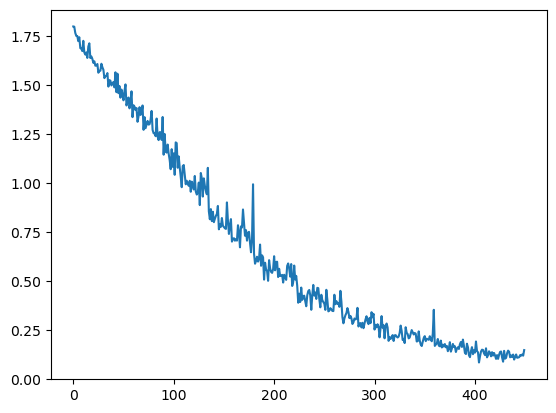

In [126]:
import matplotlib.pyplot as plt
plt.plot(train_losses)

<h3><font color="red"><strong> II.4 Initializing with pre-trained embeddings  </strong></font></h3>

Now, we would like to integrate pre-trained word embeddings into our model ! However, we need to not forget to add a vector for the padding symbol.

In [72]:
def get_glove_adapted_embeddings(glove_model, input_voc):
    keys = {i: glove_model.key_to_index.get(w, None) for w, i in input_voc.items()}
    index_dict = {i: key for i, key in keys.items() if key is not None}
    # Important change here: add one supplementary word for padding
    embeddings = np.zeros((len(input_voc)+1,glove_model.vectors.shape[1])) 
    for i, ind in index_dict.items():
        embeddings[i] = glove_model.vectors[ind]
    return embeddings

GloveEmbeddings = get_glove_adapted_embeddings(loaded_glove_model, training_word2idx)

In [73]:
print(GloveEmbeddings.shape)

(135870, 300)


Here, implement a ```PretrainedAveragingModel``` very similar to the previous model, using the ```nn.Embedding``` method ```from_pretrained()``` to initialize the embeddings from a numpy array. Use the ```requires_grad_``` method to specify if the model must fine-tune the embeddings or not ! 
<div class='alert alert-block alert-info'>
            Code:</div>

**Classe PretrainedAveragingModel**

In [74]:
class PretrainedAveragingModel(nn.Module):
    def __init__(self, embedding_dim, categories_num, pretrained_embeddings, freeze_embeddings=True):
        super(PretrainedAveragingModel, self).__init__()
        # Initialiser les embeddings à partir d'un tableau numpy
        # Ici, pretrained_embeddings doit déjà être un tensor FloatTensor
        self.embeddings = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=freeze_embeddings)
        
        # Créer une couche linéaire pour transformer la moyenne des embeddings en scores de classification
        self.linear = nn.Linear(in_features=embedding_dim, out_features=categories_num)
        
    def forward(self, inputs):
        # Obtenir les embeddings pour les entrées
        embedded = self.embeddings(inputs)
        
        # Prendre la moyenne des embeddings du document
        mask = inputs != 0  # Ignorer le padding
        masked_embedded = embedded * mask.unsqueeze(-1).float()
        x = torch.sum(masked_embedded, dim=1) / mask.sum(dim=1, keepdim=True).float()
        
        # Transformer la moyenne des embeddings en scores de classification
        o = self.linear(x)
        
        return o

<div class='alert alert-block alert-warning'>
            Questions:</div>
            
- What are the results **with and without fine-tuning of embeddings imported from GloVe** ? Explain them.
- Use the following ```sklearn``` functions: ```confusion_matrix, ConfusionMatrixDisplay, classification_report``` from (```sklearn.metrics```) to analyze the results further. 

**model_pre_trained**

In [75]:
model_pre_trained = PretrainedAveragingModel(300, max(ng_train_labels)+1, torch.FloatTensor(GloveEmbeddings), True)
opt_pre_trained = optim.Adam(model_pre_trained.parameters(), lr=0.0025, betas=(0.9, 0.999))

train_losses = experiment(model_pre_trained, opt_pre_trained, criterion)

# Evaluate both models
test_loss_pre_trained, test_acc_pre_trained = eval_model(model_pre_trained, criterion, test_dataloader)
print("\n")
print("Results with fine-tuning of embeddings from GloVe:")
print(f"Test loss: {test_loss_pre_trained}, Test accuracy: {test_acc_pre_trained}")

Beginning training...
Epoch 1:
Batch 0 : training loss = 1.7909479141235352; training acc = 24.0
Batch 20 : training loss = 1.6126468181610107; training acc = 29.0
Batch 40 : training loss = 1.5643447637557983; training acc = 36.5
Training Accuracy: 31.131540120304166
Validation Loss: 1.55620612321275, Validation Accuracy: 44.47940074906367
Epoch 1 : Validation loss = 1.55620612321275; Validation acc = 44.47940074906367
Epoch 2:
Batch 0 : training loss = 1.5807900428771973; training acc = 46.5
Batch 20 : training loss = 1.5068602561950684; training acc = 45.0
Batch 40 : training loss = 1.4779914617538452; training acc = 51.5
Training Accuracy: 46.54409261150834
Validation Loss: 1.4511043596803472, Validation Accuracy: 50.337078651685395
Epoch 2 : Validation loss = 1.4511043596803472; Validation acc = 50.337078651685395
Epoch 3:
Batch 0 : training loss = 1.4240292310714722; training acc = 56.5
Batch 20 : training loss = 1.4924631118774414; training acc = 45.0
Batch 40 : training loss = 

**model_pre_trained_light**

In [76]:
# Appel de la classe "PretrainedAveragingModel"
model_pre_trained_light = PretrainedAveragingModel(300, max(ng_train_labels)+1, torch.FloatTensor(GloveEmbeddings), False)
opt_pre_trained_light = optim.Adam(model_pre_trained_light.parameters(), lr=0.0025, betas=(0.9, 0.999))

# Appel de la fonction "experiment"
train_losses = experiment(model_pre_trained_light, opt_pre_trained_light, criterion)

# Appel de la fonction "eval_model"
test_loss_pre_trained_light, test_acc_pre_trained_light = eval_model(model_pre_trained_light, criterion, test_dataloader)

print("\n")
print("Results with fine-tuning of embeddings from GloVe:")
print(f"Test loss: {test_loss_pre_trained_light}, Test accuracy: {test_acc_pre_trained_light}")

Beginning training...
Epoch 1:
Batch 0 : training loss = 1.8168834447860718; training acc = 18.0
Batch 20 : training loss = 1.6510841846466064; training acc = 31.0
Batch 40 : training loss = 1.4653956890106201; training acc = 48.5
Training Accuracy: 36.39768471229145
Validation Loss: 1.4359162389562372, Validation Accuracy: 49.662921348314605
Epoch 1 : Validation loss = 1.4359162389562372; Validation acc = 49.662921348314605
Epoch 2:
Batch 0 : training loss = 1.3910681009292603; training acc = 57.5
Batch 20 : training loss = 1.2617580890655518; training acc = 64.0
Batch 40 : training loss = 1.0764375925064087; training acc = 70.0
Training Accuracy: 63.738508682328906
Validation Loss: 1.0789689910545777, Validation Accuracy: 70.84644194756554
Epoch 2 : Validation loss = 1.0789689910545777; Validation acc = 70.84644194756554
Epoch 3:
Batch 0 : training loss = 1.0176161527633667; training acc = 76.0
Batch 20 : training loss = 0.8582532405853271; training acc = 75.5
Batch 40 : training los

**Matrice de confusion de "model_pre_trained" et "model_pre_trained_light"**

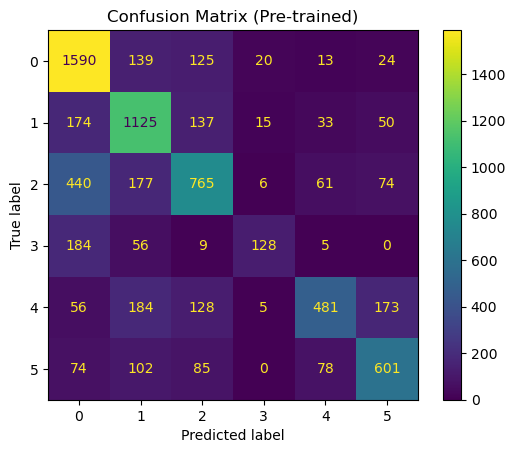

Classification Report (Pre-trained):
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      1911
           1       0.63      0.73      0.68      1534
           2       0.61      0.50      0.55      1523
           3       0.74      0.34      0.46       382
           4       0.72      0.47      0.57      1027
           5       0.65      0.64      0.65       940

    accuracy                           0.64      7317
   macro avg       0.66      0.59      0.60      7317
weighted avg       0.65      0.64      0.63      7317



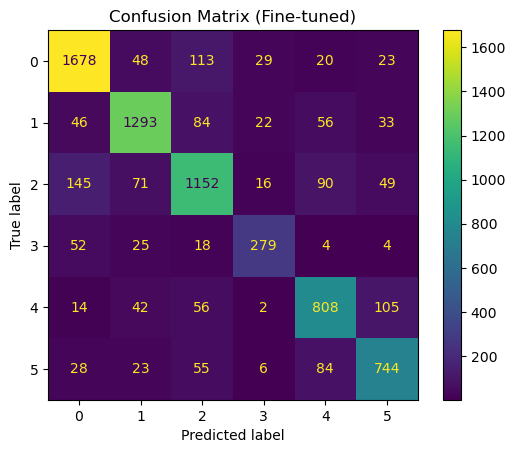

Classification Report (Fine-tuned):
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1911
           1       0.86      0.84      0.85      1534
           2       0.78      0.76      0.77      1523
           3       0.79      0.73      0.76       382
           4       0.76      0.79      0.77      1027
           5       0.78      0.79      0.78       940

    accuracy                           0.81      7317
   macro avg       0.80      0.80      0.80      7317
weighted avg       0.81      0.81      0.81      7317



In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def get_predictions(model, dataloader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds

# Get predictions and true labels for the pre-trained model
true_labels_pre_trained, predictions_pre_trained = get_predictions(model_pre_trained, test_dataloader)

# Calculate and display the confusion matrix for the pre-trained model
cm_pre_trained = confusion_matrix(true_labels_pre_trained, predictions_pre_trained)
disp_pre_trained = ConfusionMatrixDisplay(cm_pre_trained)
disp_pre_trained.plot()
plt.title('Confusion Matrix (Pre-trained)')
plt.show()

# Print classification report for the pre-trained model
print("Classification Report (Pre-trained):")
print(classification_report(true_labels_pre_trained, predictions_pre_trained))

# Repeat the process for the fine-tuned model
true_labels_pre_trained_light, predictions_pre_trained_light = get_predictions(model_pre_trained_light, test_dataloader)

# Calculate and display the confusion matrix for the fine-tuned model
cm_pre_trained_light = confusion_matrix(true_labels_pre_trained_light, predictions_pre_trained_light)
disp_pre_trained_light = ConfusionMatrixDisplay(cm_pre_trained_light)
disp_pre_trained_light.plot()
plt.title('Confusion Matrix (Fine-tuned)')
plt.show()

# Print classification report for the fine-tuned model
print("Classification Report (Fine-tuned):")
print(classification_report(true_labels_pre_trained_light, predictions_pre_trained_light))

**CONCLUSION**

**Pour le modèle pré-entraîné (sans réglage fin) :**

Les scores de précision varient de 0,61 à 0,72 par classe, indiquant que le modèle est relativement moins certain de ses prédictions pour certaines classes par rapport à d'autres.
Les rappels (recall) varient de 0.36 à 0.78, suggérant que le modèle manque un grand nombre de prédictions positives vraies pour la classe 3 et performe mieux pour la classe 0.\
Les scores F1, qui sont des moyennes harmoniques de la précision et du rappel, varient de 0.48 à 0.72, avec des performances particulièrement basses pour la classe 3, ce qui implique que cette classe a le plus grand déséquilibre entre précision et rappel.
La précision globale est de 0,65, ce qui est respectable mais indique une marge d'amélioration.

**Pour le modèle fine-tuned (avec fine-tuning) :**

Les scores de précision et de rappel sont nettement améliorés pour toutes les classes, avec des précisions allant de 0,75 à 0,87 et des rappels allant de 0,72 à 0,88.
Les scores F1 suivent le même schéma d'amélioration et sont de 0,76 à 0,86 pour toutes les classes.
La précision globale a considérablement augmenté à 0,81, indiquant que le réglage fin a permis au modèle d'être significativement plus précis dans ses prédictions.\
Les moyennes macro et pondérées ont également augmenté, ce qui suggère que l'amélioration est cohérente à travers toutes les classes.
En conclusion, la mise au point des plongements a mené à une essentiellement des performances du modèle. Cela pourrait être dû à la capacité du modèle fine-tuned à adapter les embeddings à la spécificité du domaine et des données traitées, alors que le modèle pré-entraîné était limité par des embeddings génériques qui n'avaient pas été optimisés pour cette tâche particulière .

<h3><font color="red"><strong> II.5 With a LSTM model </strong></font></h3>

In [78]:
# Create a toy example of LSTM:
lstm = nn.LSTM(3, 3)  # Input dim is 3, output dim is 3
inputs = [torch.randn(1, 3) for _ in range(5)]  # make a sequence of length 5

# LSTMs expect inputs having 3 dimensions:
# - The first dimension is the temporal dimension, along which we (in our case) have the different words
# - The second dimension is the batch dimension, along which we stack the independant batches
# - The third dimension is the feature dimension, along which are the features of the vector representing the words

# In our toy case, we have inputs and outputs containing 3 features (third dimension !)
# We created a sequence of 5 different inputs (first dimension !)
# We don't use batch (the second dimension will have one lement)

# We need an initial hidden state, of the right sizes for dimension 2/3, but with only one temporal element:
# Here, it is:
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
# Why do we create a tuple of two tensors ? Because we use LSTMs: remember that they use two sets of weights,
# and two hidden states (Hidden state, and Cell state).
# If you don't remember, read: https://colah.github.io/posts/2015-08-Understanding-LSTMs/
# If we used a classic RNN, we would simply have:
# hidden = torch.randn(1, 1, 3)

# The naive way of applying a lstm to inputs is to apply it one step at a time, and loop through the sequence
for i in inputs:
    # After each step, hidden contains the hidden states (remember, it's a tuple of two states).
    out, hidden = lstm(i.view(1, 1, -1), hidden)
    
# Alternatively, we can do the entire sequence all at once.
# The first value returned by LSTM is all of the Hidden states throughout the sequence.
# The second is just the most recent Hidden state and Cell state (you can compare the values)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence, for each temporal step
# "hidden" will allow you to continue the sequence and backpropagate later, with another sequence
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3))  # Re-initialize
out, hidden = lstm(inputs, hidden)
print(out)
print(hidden)

tensor([[[-0.1771,  0.1419,  0.1177]],

        [[-0.2831,  0.0431,  0.0132]],

        [[-0.2871, -0.0785,  0.0721]],

        [[-0.1306,  0.0873,  0.0127]],

        [[-0.1821,  0.0439,  0.0642]]], grad_fn=<MkldnnRnnLayerBackward0>)
(tensor([[[-0.1821,  0.0439,  0.0642]]], grad_fn=<StackBackward0>), tensor([[[-0.6757,  0.1474,  0.1700]]], grad_fn=<StackBackward0>))


### Creating our own LSTM Model

We'll implement now a LSTM model, taking the same inputs and also outputing a score for the sentence.

<div class='alert alert-block alert-info'>
            Code:</div>

**Classe LSTMModel complétée**

In [79]:
class LSTMModel(nn.Module):
    def __init__(self, embedding_dim, vocabulary_size, hidden_dim, num_classes, embeddings=None, fine_tuning=False):
        super(LSTMModel, self).__init__()
        
        # Initialisation de la couche d'embedding
        if embeddings is not None:
            self.embeddings = nn.Embedding.from_pretrained(embeddings, freeze=not fine_tuning)
        else:
            self.embeddings = nn.Embedding(num_embeddings=vocabulary_size, embedding_dim=embedding_dim)
        
        # Définition de la couche LSTM
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, batch_first=True)
        
        # Définition de la couche linéaire pour la classification finale
        self.linear = nn.Linear(hidden_dim, num_classes)
        
    def forward(self, inputs):
        # Extraction des embeddings pour chaque mot dans les séquences
        embedded = self.embeddings(inputs)
        
        # Passage à travers la couche LSTM
        # Nous utilisons seulement le dernier état caché pour la classification
        _, (hidden, _) = self.lstm(embedded)
        
        # Passage à travers la couche linéaire
        # Notez que hidden contient les états cachés du dernier élément de la séquence pour chaque batch
        # hidden est de forme (num_layers * num_directions, batch, hidden_size)
        # Pour un LSTM unidirectionnel à une seule couche, la forme est (1, batch, hidden_size)
        output = self.linear(hidden[-1])
        
        return output

In [80]:
recurrent_model = LSTMModel(300, len(training_word2idx), 100, max(ng_train_labels)+1)
opt_recurrent = optim.Adam(recurrent_model.parameters(), lr=0.01, betas=(0.9, 0.999))

In [81]:
train_losses = experiment(recurrent_model, opt_recurrent, criterion)

Beginning training...
Epoch 1:
Batch 0 : training loss = 1.8207473754882812; training acc = 16.5
Batch 20 : training loss = 1.6951757669448853; training acc = 25.5
Batch 40 : training loss = 1.6626945734024048; training acc = 31.0
Training Accuracy: 26.93224378617637
Validation Loss: 1.6783031051078539, Validation Accuracy: 28.209737827715355
Epoch 1 : Validation loss = 1.6783031051078539; Validation acc = 28.209737827715355
Epoch 2:
Batch 0 : training loss = 1.582324504852295; training acc = 42.5
Batch 20 : training loss = 1.483360767364502; training acc = 43.5



KeyboardInterrupt



<div class='alert alert-block alert-warning'>
            Questions:</div>
            
- What do you see with a simple application of LSTMs (Que voyez-vous avec une simple application des LSTM ?) ? 
- What do you think may be happening in this case (Selon vous, que peut-il se passer dans ce cas ?) ? 

**Le premier modèle** montre l'application directe d'un LSTM sur une séquence de données jouet (toy data) sans aucune couche d'embedding ou de classification supplémentaire. Le LSTM est appliqué élément par élément sur la séquence, et puis en une seule fois pour l'ensemble de la séquence. Ce résultat donne deux éléments principaux :\

**out** est un ensemble d'états cachés pour chaque instant dans la séquence, affichant comment les données de séquence se propagent dans le temps à travers le LSTM.

**hidden** sont les derniers états cachés (état caché et état de la cellule) après avoir traité toute la séquence. Ceux-ci seraient utilisés pour continuer la séquence si nécessaire.

**Le deuxième modèle** cas montre un LSTM plus élaboré, qui fait partie d'un modèle de classification de texte complet. Ce modèle utilise des embeddings (potentiellement pré-entraînés), les passe à travers une couche LSTM et utilise finalement l'état caché final pour une classification avec une couche linéaire. Les logs d'entraînement montrent une de la précision au fil des époques, mais **il semble y avoir un arrêt précoce après la quatrième époque, ce qui suggère que le modèle ne s'améliore plus au-delà de ce point sur l'ensemble de validation.**

Que voyez-vous avec une simple application des LSTM ? 
Dans le premier cas, nous voyons le comportement de base d'un LSTM traitant des données séquentielles. Cela montre le potentiel de l'LSTM à capturer les dépendances temporelles dans les données, mais sans un cadre de tâche spécifique (par exemple, classification ou prédiction de la prochaine valeur), il est difficile d'évaluer l'efficacité de l'apprentissage. .

**What do you think may be happening in this case ?**

Dans le deuxième modèle, le cadre est bien plus structuré pour une tâche spécifique, en l'occurrence, une forme de classification de texte. Le modèle utilise une combinaison de couches d'embedding, LSTM et une couche linéaire pour effectuer cette tâche. L'arrêt précoce après la quatrième époque suggère plusieurs points :

**Surapprentissage (Overfitting) :** Le modèle peut commencer à trop bien apprendre les détails et le bruit de l'ensemble d'entraînement au détriment de sa capacité à généraliser à de nouvelles données. Cela peut être pourquoi l’amélioration continue sur l’ensemble de validation.

**Capacité du Modèle :** Le modèle pourrait atteindre sa capacité maximale d'apprentissage avec les paramètres actuels et la structure du réseau. Cela signifie que sans ajustements dans l'architecture du modèle ou dans les hyperparamètres, il peut ne pas être possible d'améliorer davantage les performances.

**Qualité des Données et Prétraitement :** Les données d'entraînement et leur prétraitement jouent un rôle crucial dans l'apprentissage des modèles de deep learning. Si les données ne sont pas suffisamment variées, ou si le prétraitement ne les rend pas adéquats pour l'apprentissage, le modèle pourrait ne pas être capable d'apprendre efficacement.

**Nécessité d'Ajustement des Hyperparamètres :** L'optimisation des hyperparamètres, comme le taux d'apprentissage, la taille des lots (batch size), le nombre d'unités LSTM, ou même l'utilisation de techniques de régularisation comme le dropout, peut avoir un impact significatif sur la performance du modèle. Un ajustement fin de ces paramètres pourrait aider à améliorer les performances sur l'ensemble de validation et à réduire le surapprentissage.

En conclusion, alors que le premier modèle illustre le fonctionnement de base d'un LSTM sur des données séquentielles sans contexte de tâche spécifique, le deuxième modèle met en lumière les défis liés à l'application de ces modèles à des tâches spécifiques comme la classification de texte. L'amélioration des performances dans de telles tâches nécessite une attention particulière portée à l'architecture du modèle, à l'ajustement des hyperparamètres et à la qualité des données d'entraînement.

############################################# **Merci de m'avoir lu** #################################################